# Boston Housing Prices: Linear Regression

In [1]:
import os

#data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\arvenka\\source\\repos\\arunvambur\\iit-datascience-aiml'

In [3]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'assignments',
 'Boston_Housing_Dataset.csv',
 'Boston_Housing_Dataset.png',
 'Linear Algebra.ipynb',
 'ML',
 'ML01-Linear-Regression.ipynb',
 'README.md',
 'statshandson14jan.ipynb']

# Step 1: Loading the dataset

In [4]:
df = pd.read_csv("Boston_Housing_Dataset.csv");
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.sample(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
175,175,0.06664,0.0,4.05,0.0,0.510,6.546,33.1,3.1323,5.0,296.0,16.6,390.96,5.33,29.4
91,91,0.03932,0.0,3.41,0.0,0.489,6.405,73.9,3.0921,2.0,270.0,17.8,393.55,8.20,22.0
295,295,0.12932,0.0,13.92,0.0,0.437,6.678,31.1,5.9604,4.0,289.0,16.0,396.90,6.27,28.6
303,303,0.10000,34.0,6.09,0.0,0.433,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86,33.1
265,265,0.76162,20.0,3.97,0.0,0.647,5.560,62.8,1.9865,5.0,264.0,13.0,392.40,10.45,22.8


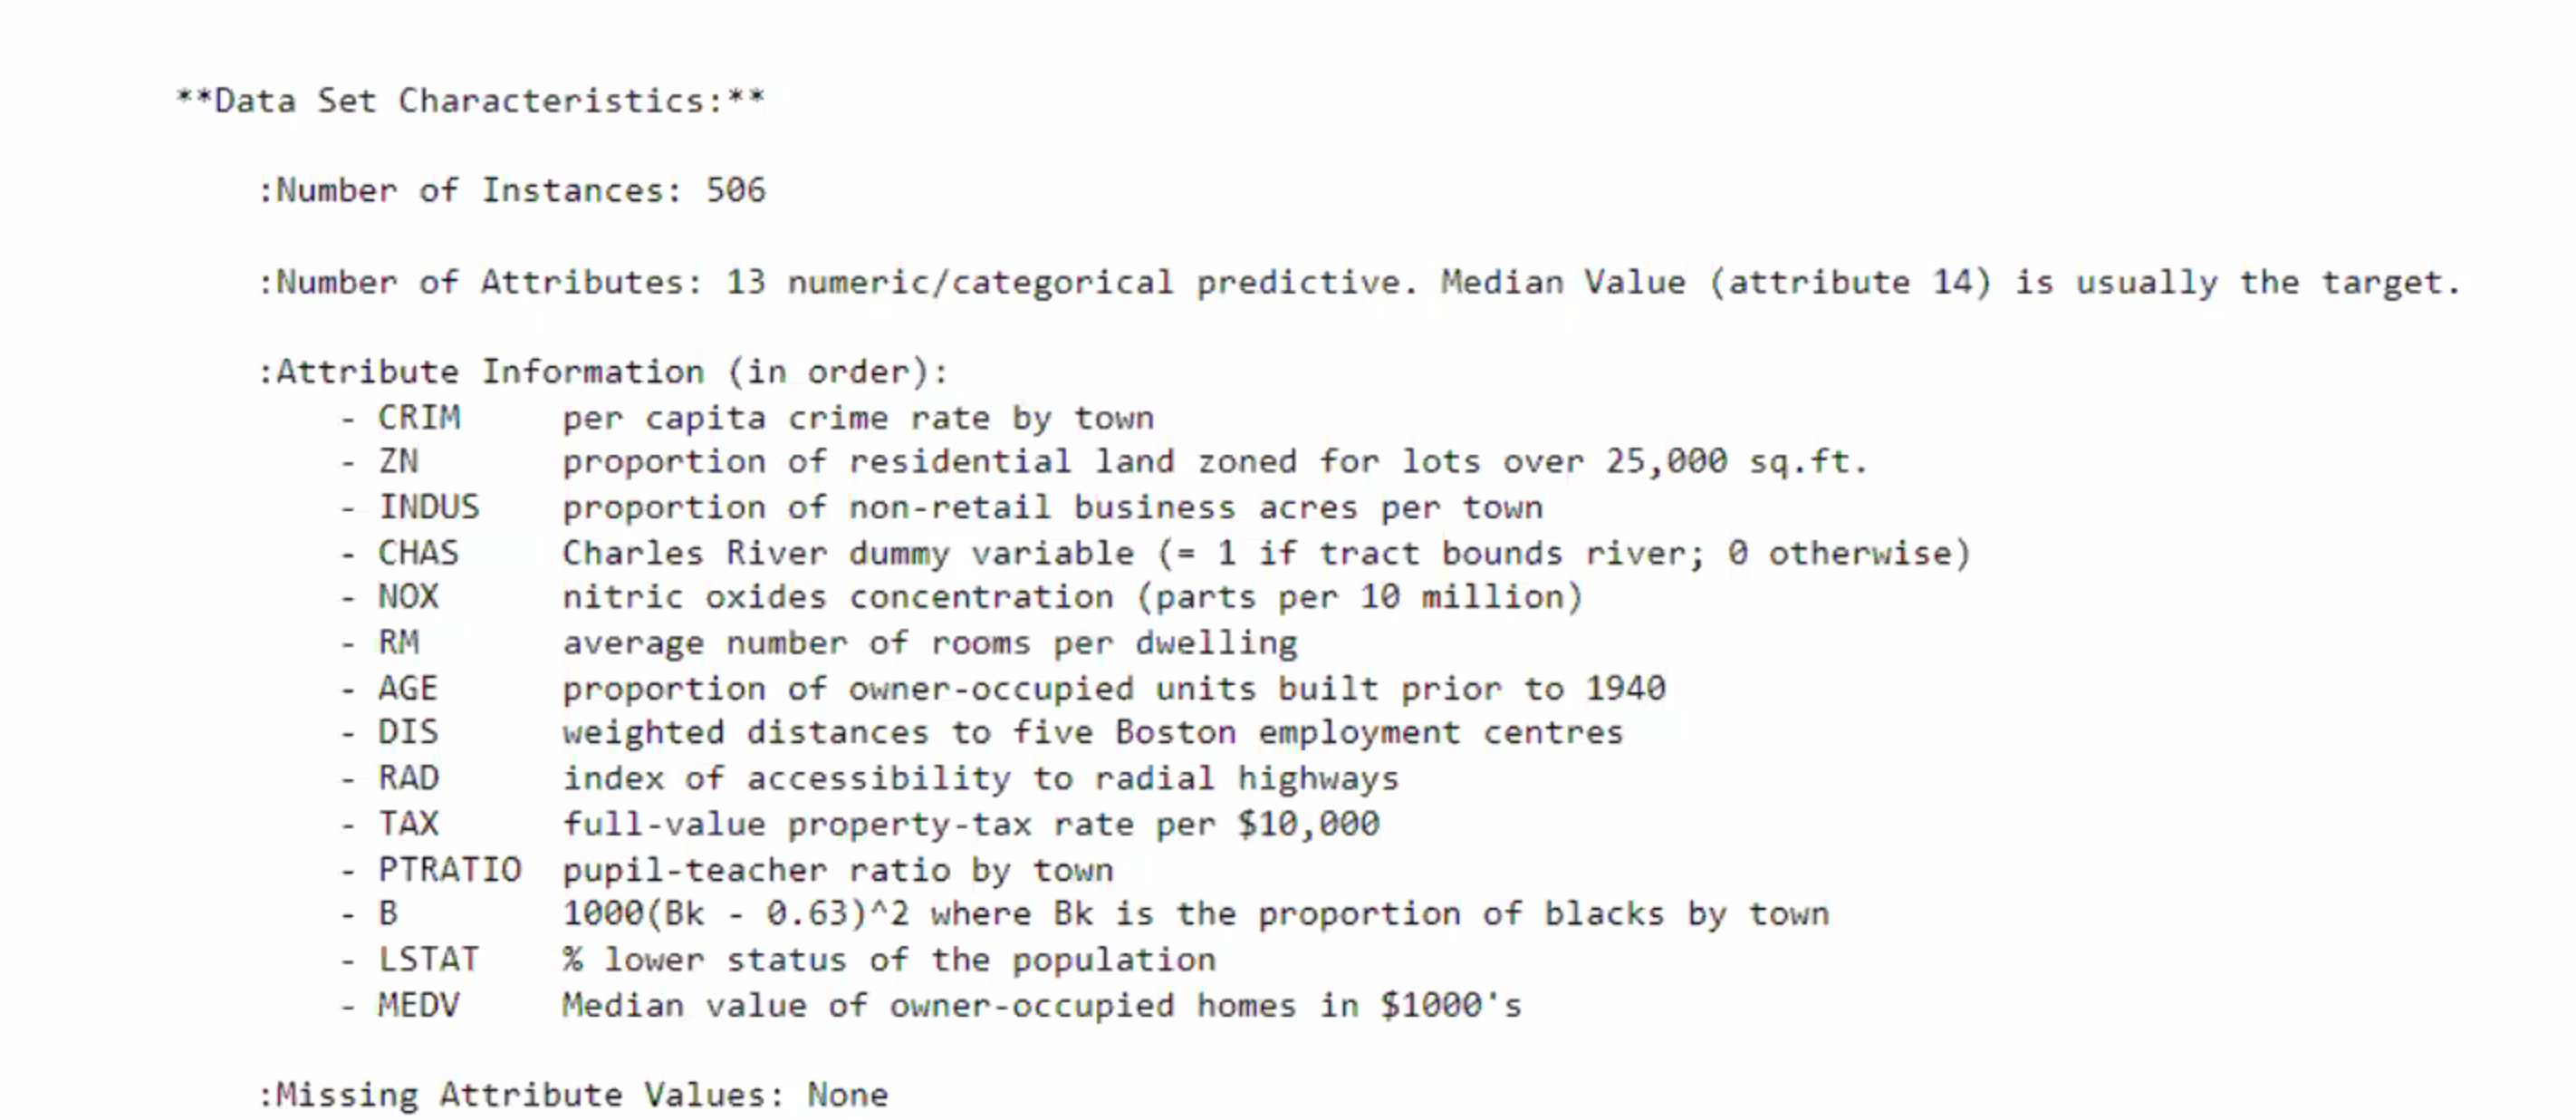

In [6]:
df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

## Drop the collumn 'Unnamed: 0'

In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

## Step2: Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Check for missing data

In [9]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### Can you guys try plotting histogram to understand the distribution of `median price`

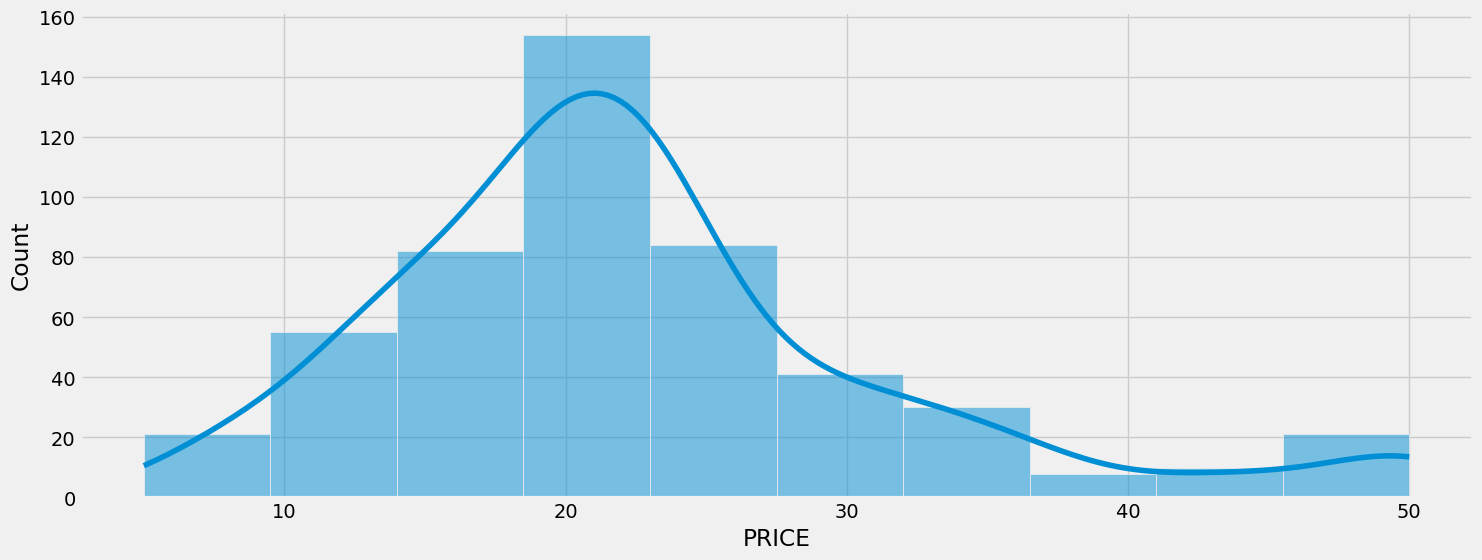

In [10]:
plt.style.use('fivethirtyeight') #theme
plt.subplots(figsize=(16, 6))
sns.histplot(df['PRICE'], bins=10, kde=True)
plt.show()

- On an average median prices moves around 22K USD
- Distribution is slightly right skewed and there are close to ~20-30 houses in the price range of 40-50K USD

### Let us filter all the houses with price more than `45K USD`

In [11]:
select_house_more_than_45k = df['PRICE'] > 45
df[select_house_more_than_45k]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
228,0.29819,0.0,6.20,0.0,0.5040,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92,46.7


In [12]:
df[select_house_more_than_45k].shape

(22, 14)

In [13]:
df[select_house_more_than_45k]['RM'].mean()

7.608772727272726

- Key take away here is that number of rooms per house seems to be key driving factor for prices

## Step3: Key Inputs Selection/ Feature Selection

### Correlation Coefficient

The correlation coefficient is a statistical measue that descrie and direction of the relationship between two variables. I ranges from -1 to 1 (-1 <= r <= 1)

### Correlation Plot

`helps to do the feature selection`

`let us plot the correlation heat map`

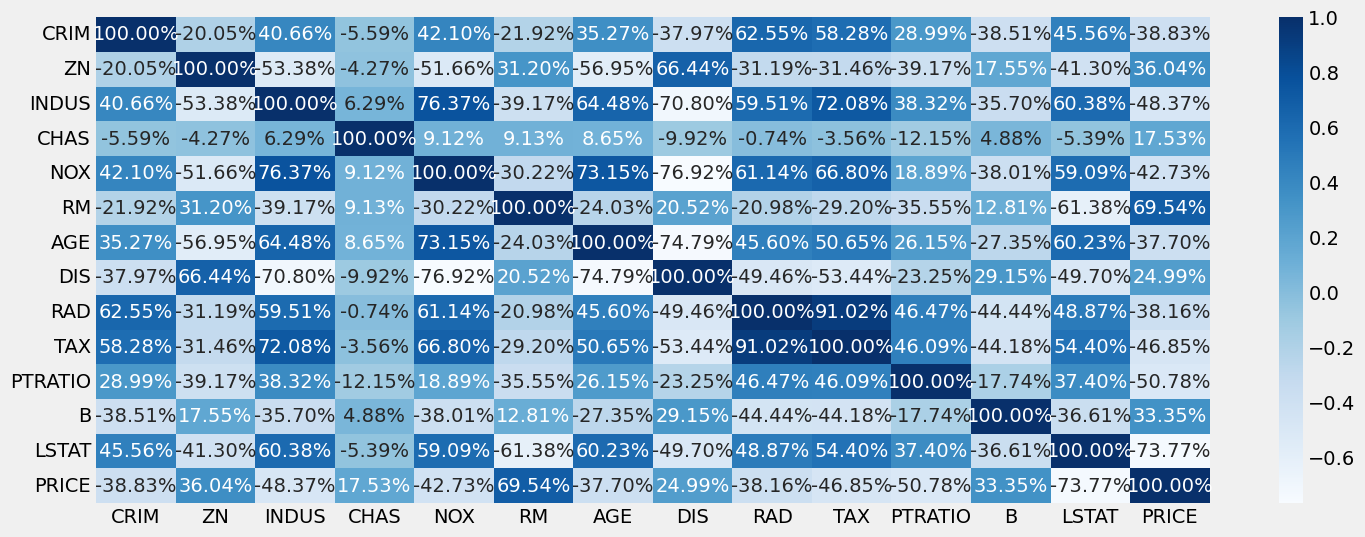

In [14]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2%')
plt.show()

### Simple Linear Regression

`One x and One y`

`x:RM` `Y:PRICE`

## Step 4: Building Machine Learning Model

### Splitting data as training, validation and testing data sets

- Industry standard 80% of random data to training and 20% of data for testing or validation

In [22]:
X = df["RM"]
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [23]:
type(X)

pandas.core.series.Series

### ML model needs data to be in array format for one dimension - only one X
`np.array()`

In [24]:
X = np.array(X).reshape(-1, 1) # transform the pandas series to the required format - required by Scikitlearn

In [25]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [26]:
X.ndim

2

In [28]:
Y = df['PRICE']
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [31]:
Y = np.array(Y).reshape(-1, 1)
Y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [32]:
Y.ndim

2

### Split this 'X' and 'Y' using 80% for training and 20% for testing - leveraging Scikitlearn

### import libraries from sklearn

In [38]:
from sklearn.linear_model import LinearRegression  # select the model
from sklearn.model_selection import train_test_split, cross_val_score # training and validation sets
from sklearn.metrics import mean_squared_error, r2_score # performance of the model

In [60]:
X_train_1, X_val_1, Y_train_1, Y_val_1 = train_test_split(X, Y, test_size=0.20, random_state=5) 
# random state keeps the memory of random data to reproduce the same sample again and again

In [61]:
X_train_1

array([[5.701],
       [7.923],
       [5.957],
       [6.12 ],
       [6.404],
       [4.97 ],
       [6.162],
       [4.973],
       [6.696],
       [5.981],
       [6.471],
       [7.107],
       [6.655],
       [6.13 ],
       [5.604],
       [6.03 ],
       [6.004],
       [5.593],
       [5.968],
       [7.42 ],
       [6.31 ],
       [5.706],
       [5.998],
       [6.781],
       [6.209],
       [5.951],
       [6.021],
       [7.875],
       [7.802],
       [6.373],
       [5.818],
       [6.151],
       [6.545],
       [6.113],
       [5.427],
       [4.652],
       [6.456],
       [6.739],
       [6.023],
       [6.152],
       [5.456],
       [5.868],
       [7.274],
       [5.875],
       [6.575],
       [5.741],
       [6.474],
       [6.345],
       [5.857],
       [7.016],
       [6.459],
       [6.193],
       [6.75 ],
       [7.249],
       [5.454],
       [6.487],
       [6.998],
       [7.163],
       [6.749],
       [6.975],
       [5.399],
       [6.968],
       [

In [62]:
X_train_1.shape

(404, 1)

In [63]:
X_train_1.mean()

6.288455445544555

### Train the model

In [64]:
slrm_1 = LinearRegression() # calling the linear regression model and creating the model object
slrm_1

LinearRegression()

### training is as good as fitting

In [65]:
slrm_1.fit(X_train_1, Y_train_1) # 80% split from RM and Price to traim model

LinearRegression()

### Validating the model

In [68]:
y_predicted_1 = slrm_1.predict(X_val_1)
y_predicted_1

array([[38.10145909],
       [25.66038564],
       [23.78098944],
       [10.44874691],
       [35.02207282],
       [13.96048253],
       [28.71330154],
       [26.50743745],
       [26.41037943],
       [23.95745857],
       [32.59562233],
       [19.9692563 ],
       [19.85455137],
       [31.00740019],
       [24.84862766],
       [19.2016156 ],
       [ 7.99582605],
       [14.84282817],
       [14.71929978],
       [17.95750826],
       [12.09873325],
       [23.38393391],
       [40.09556022],
       [23.47216847],
       [29.70152865],
       [18.81338352],
       [23.41922773],
       [21.65453646],
       [22.88982035],
       [25.21038937],
       [18.83103043],
       [14.93106273],
       [19.10455758],
       [32.39268283],
       [24.46921904],
       [22.97805492],
       [25.6692091 ],
       [19.18396869],
       [41.26025646],
       [29.13682744],
       [21.80453522],
       [11.44579748],
       [25.55450417],
       [19.8898452 ],
       [24.94568568],
       [27

### Measure the model performance

### Root mean squared error

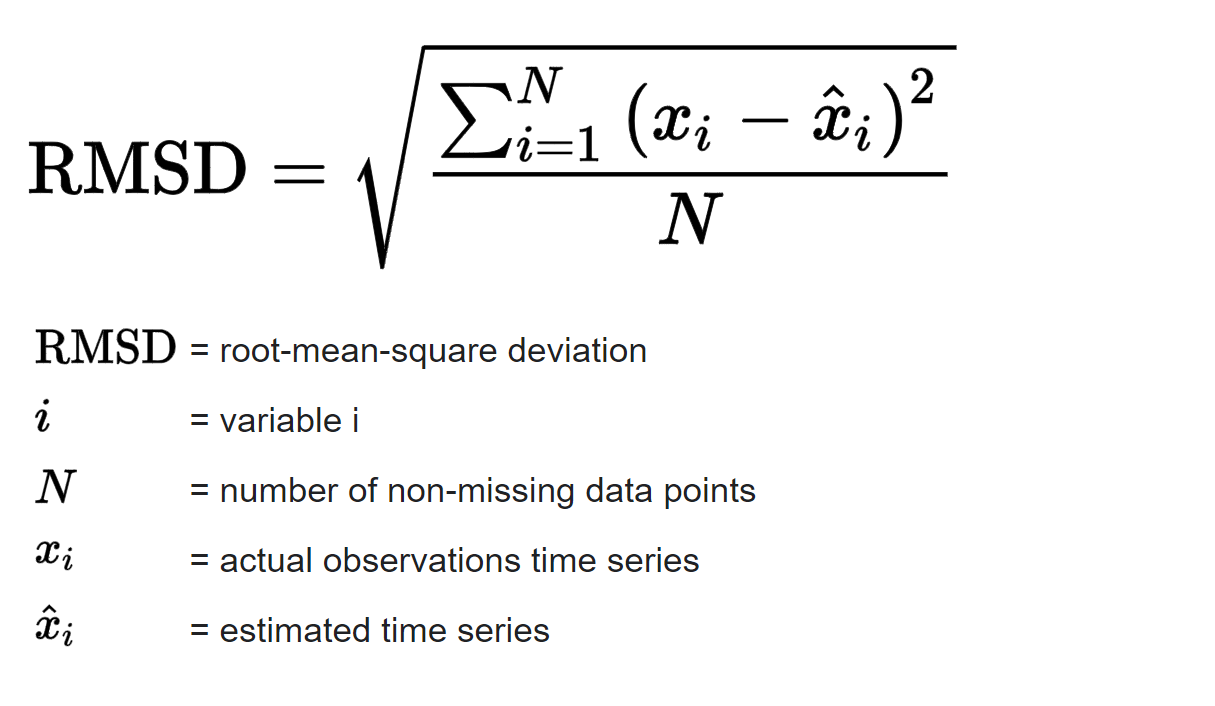

In [70]:
mean_squared_error = mean_squared_error(y_predicted_1, Y_val_1)
mean_squared_error

23.970455527991305

In [73]:
rmse = np.sqrt(mean_squared_error)
rmse

4.895963186952216

In [74]:
Y.min()

5.0

In [75]:
Y.max()

50.0

In [76]:
Y.mean()

22.532806324110677

In [80]:
error = rmse/Y.mean() * 100
print("Error:", error)
print("Accuracy: ", 100-error)

Error: 21.728155457109715
Accuracy:  78.27184454289028


### R-Squared

In [82]:
r_squared = slrm_1.score(X_val_1, Y_val_1)
r_squared

0.6938399401553497

### Task #1: Build simple linear regression model for each of the inputs taking one at a time

### PRICE VS B 

In [28]:
from sklearn.linear_model import LinearRegression  # select the model
from sklearn.model_selection import train_test_split, cross_val_score # training and validation sets
from sklearn.metrics import mean_squared_error, r2_score # performance of the model

X = df["B"]
Y = df["PRICE"]
X = np.array(X).reshape(-1, 1)
print(f"X mean: {X.mean()}")
Y = np.array(Y).reshape(-1, 1)
print(f'Y min: {Y.min()}, Y max: {Y.max()}')

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X, Y, test_size=0.20, random_state=5) 

slrm_2 = LinearRegression()
slrm_2.fit(X_train_2, y_train_2) # 80% split from RM and Price to traim model

y_predicted_2 = slrm_2.predict(X_val_2)
#print(y_predicted_2)

mean_squared_error = mean_squared_error(y_predicted_2, y_val_2)
print(f"mse: {mean_squared_error}")

rmse = np.sqrt(mean_squared_error)
print(f"rmse: {rmse}")

error = rmse/Y.mean() * 100
print("Error:", error)
print("Accuracy: ", 100-error)

X mean: 356.6740316205534
Y min: 5.0, Y max: 50.0
mse: 66.56597738624316
rmse: 8.158797545364338
Error: 36.20852825879135
Accuracy:  63.79147174120865


### PRICE VS DIS

In [29]:
from sklearn.linear_model import LinearRegression  # select the model
from sklearn.model_selection import train_test_split, cross_val_score # training and validation sets
from sklearn.metrics import mean_squared_error, r2_score # performance of the model

X = df["DIS"]
Y = df["PRICE"]
X = np.array(X).reshape(-1, 1)
print(f"X mean: {X.mean()}")
Y = np.array(Y).reshape(-1, 1)
print(f'Y min: {Y.min()}, Y max: {Y.max()}')

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X, Y, test_size=0.20, random_state=5) 

slrm_2 = LinearRegression()
slrm_2.fit(X_train_2, y_train_2) # 80% split from RM and Price to traim model

y_predicted_2 = slrm_2.predict(X_val_2)
#print(y_predicted_2)

mean_squared_error = mean_squared_error(y_predicted_2, y_val_2)
print(f"mse: {mean_squared_error}")

rmse = np.sqrt(mean_squared_error)
print(f"rmse: {rmse}")

error = rmse/Y.mean() * 100
print("Error:", error)
print("Accuracy: ", 100-error)

X mean: 3.795042687747036
Y min: 5.0, Y max: 50.0
mse: 74.25783765836505
rmse: 8.617298744871565
Error: 38.24334448590558
Accuracy:  61.75665551409442


### PRICE VS ZN

In [30]:
from sklearn.linear_model import LinearRegression  # select the model
from sklearn.model_selection import train_test_split, cross_val_score # training and validation sets
from sklearn.metrics import mean_squared_error, r2_score # performance of the model

X = df["ZN"]
Y = df["PRICE"]
X = np.array(X).reshape(-1, 1)
print(f"X mean: {X.mean()}")
Y = np.array(Y).reshape(-1, 1)
print(f'Y min: {Y.min()}, Y max: {Y.max()}')

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X, Y, test_size=0.20, random_state=5) 

slrm_2 = LinearRegression()
slrm_2.fit(X_train_2, y_train_2) # 80% split from RM and Price to traim model

y_predicted_2 = slrm_2.predict(X_val_2)
#print(y_predicted_2)

mean_squared_error = mean_squared_error(y_predicted_2, y_val_2)
print(f"mse: {mean_squared_error}")

rmse = np.sqrt(mean_squared_error)
print(f"rmse: {rmse}")

error = rmse/Y.mean() * 100
print("Error:", error)
print("Accuracy: ", 100-error)

X mean: 11.363636363636363
Y min: 5.0, Y max: 50.0
mse: 75.10830109944823
rmse: 8.666504549092917
Error: 38.46171854687952
Accuracy:  61.53828145312048


### PRICE VS LSTAT

In [31]:
from sklearn.linear_model import LinearRegression  # select the model
from sklearn.model_selection import train_test_split, cross_val_score # training and validation sets
from sklearn.metrics import mean_squared_error, r2_score # performance of the model

X = df["LSTAT"]
Y = df["PRICE"]
X = np.array(X).reshape(-1, 1)
print(f"X mean: {X.mean()}")
Y = np.array(Y).reshape(-1, 1)
print(f'Y min: {Y.min()}, Y max: {Y.max()}')

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X, Y, test_size=0.20, random_state=5) 

slrm_2 = LinearRegression()
slrm_2.fit(X_train_2, y_train_2) # 80% split from RM and Price to traim model

y_predicted_2 = slrm_2.predict(X_val_2)
#print(y_predicted_2)

mean_squared_error = mean_squared_error(y_predicted_2, y_val_2)
print(f"mse: {mean_squared_error}")

rmse = np.sqrt(mean_squared_error)
print(f"rmse: {rmse}")

error = rmse/Y.mean() * 100
print("Error:", error)
print("Accuracy: ", 100-error)

X mean: 12.653063241106722
Y min: 5.0, Y max: 50.0
mse: 38.82182901428658
rmse: 6.2307165730986815
Error: 27.651755771013995
Accuracy:  72.348244228986


### Task3: Analyse if you can find 7 or more rooms in a house in higher LSTAT

`Input vars: RM, LSTAT and model Multiple Linear Regression Model`

In [32]:
df['RM'].mean()

6.284634387351779

In [33]:
housing =df['RM'] >=7
housing

0      False
1      False
2       True
3      False
4       True
       ...  
501    False
502    False
503    False
504    False
505    False
Name: RM, Length: 506, dtype: bool

In [39]:
X = df[["RM", "LSTAT"]]
X

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [44]:
X = np.array(X).reshape(-1, 2)
X

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       ...,
       [6.976, 5.64 ],
       [6.794, 6.48 ],
       [6.03 , 7.88 ]])

In [50]:
from sklearn.linear_model import LinearRegression  # select the model
from sklearn.model_selection import train_test_split, cross_val_score # training and validation sets
from sklearn.metrics import mean_squared_error, r2_score # performance of the model

#housing d=f['RM'] >=7

X = df[["RM", "LSTAT"]]
Y = df["PRICE"]
#X = np.array(X).reshape(-1, 2)
print(f"X mean: {X.mean()}")
#Y = np.array(Y).reshape(-1, 1)
print(f'Y min: {Y.min()}, Y max: {Y.max()}')

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X, Y, test_size=0.20, random_state=5) 

slrm_2 = LinearRegression()
slrm_2.fit(X_train_2, y_train_2) # 80% split from RM and Price to traim model

y_predicted_2 = slrm_2.predict(X_val_2)
#print(y_predicted_2)

mean_squared_error = mean_squared_error(y_predicted_2, y_val_2)
print(f"mse: {mean_squared_error}")

rmse = np.sqrt(mean_squared_error)
print(f"rmse: {rmse}")

error = rmse/Y.mean() * 100
print("Error:", error)
print("Accuracy: ", 100-error)

r_squared = slrm_2.score(X_val_2, y_val_2)
print(f'r squared: {r_squared*100}')

X mean: RM        6.284634
LSTAT    12.653063
dtype: float64
Y min: 5.0, Y max: 50.0
mse: 26.39288682266608
rmse: 5.137400784702911
Error: 22.799649146257302
Accuracy:  77.20035085374269
r squared: 66.28996975186953


### Task4: Build another model with RM and Tax

In [53]:
from sklearn.linear_model import LinearRegression  # select the model
from sklearn.model_selection import train_test_split, cross_val_score # training and validation sets
from sklearn.metrics import mean_squared_error, r2_score # performance of the model

#housing d=f['RM'] >=7

X = df[["RM", "TAX", "INDUS", "LSTAT", "PTRATIO"]]
Y = df["PRICE"]
#X = np.array(X).reshape(-1, 2)
print(f"X mean: {X.mean()}")
#Y = np.array(Y).reshape(-1, 1)
print(f'Y min: {Y.min()}, Y max: {Y.max()}')

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X, Y, test_size=0.20, random_state=5) 

slrm_2 = LinearRegression()
slrm_2.fit(X_train_2, y_train_2) # 80% split from RM and Price to traim model

y_predicted_2 = slrm_2.predict(X_val_2)
#print(y_predicted_2)

mean_squared_error = mean_squared_error(y_predicted_2, y_val_2)
print(f"mse: {mean_squared_error}")

rmse = np.sqrt(mean_squared_error)
print(f"rmse: {rmse}")

error = rmse/Y.mean() * 100
print("Error:", error)
print("Accuracy: ", 100-error)

r_squared = slrm_2.score(X_val_2, y_val_2)
print(f'r squared: {r_squared*100}')

X mean: RM           6.284634
TAX        408.237154
INDUS       11.136779
LSTAT       12.653063
PTRATIO     18.455534
dtype: float64
Y min: 5.0, Y max: 50.0
mse: 23.84960738031444
rmse: 4.8836059812718755
Error: 21.6733145043114
Accuracy:  78.3266854956886
r squared: 69.53834600972907


#### For more than one variable use `adjusted R Squared`

In [ ]:
### Multi Collinearity with RM + TAX and RM + TAX + RAD

In [54]:
from sklearn.linear_model import LinearRegression  # select the model
from sklearn.model_selection import train_test_split, cross_val_score # training and validation sets
from sklearn.metrics import mean_squared_error, r2_score # performance of the model

#housing d=f['RM'] >=7

X = df[["RM", "TAX"]]
Y = df["PRICE"]
#X = np.array(X).reshape(-1, 2)
print(f"X mean: {X.mean()}")
#Y = np.array(Y).reshape(-1, 1)
print(f'Y min: {Y.min()}, Y max: {Y.max()}')

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X, Y, test_size=0.20, random_state=5) 

slrm_2 = LinearRegression()
slrm_2.fit(X_train_2, y_train_2) # 80% split from RM and Price to traim model

y_predicted_2 = slrm_2.predict(X_val_2)
#print(y_predicted_2)

mean_squared_error = mean_squared_error(y_predicted_2, y_val_2)
print(f"mse: {mean_squared_error}")

rmse = np.sqrt(mean_squared_error)
print(f"rmse: {rmse}")

error = rmse/Y.mean() * 100
print("Error:", error)
print("Accuracy: ", 100-error)

r_squared = slrm_2.score(X_val_2, y_val_2)
print(f'r squared: {r_squared*100}')

X mean: RM       6.284634
TAX    408.237154
dtype: float64
Y min: 5.0, Y max: 50.0
mse: 19.57997344484023
rmse: 4.424926377335586
Error: 19.637706523047697
Accuracy:  80.3622934769523
r squared: 74.99168993835433


In [55]:
from sklearn.linear_model import LinearRegression  # select the model
from sklearn.model_selection import train_test_split, cross_val_score # training and validation sets
from sklearn.metrics import mean_squared_error, r2_score # performance of the model

#housing d=f['RM'] >=7

X = df[["RM", "TAX", "RAD"]]
Y = df["PRICE"]
#X = np.array(X).reshape(-1, 2)
print(f"X mean: {X.mean()}")
#Y = np.array(Y).reshape(-1, 1)
print(f'Y min: {Y.min()}, Y max: {Y.max()}')

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X, Y, test_size=0.20, random_state=5) 

slrm_2 = LinearRegression()
slrm_2.fit(X_train_2, y_train_2) # 80% split from RM and Price to traim model

y_predicted_2 = slrm_2.predict(X_val_2)
#print(y_predicted_2)

mean_squared_error = mean_squared_error(y_predicted_2, y_val_2)
print(f"mse: {mean_squared_error}")

rmse = np.sqrt(mean_squared_error)
print(f"rmse: {rmse}")

error = rmse/Y.mean() * 100
print("Error:", error)
print("Accuracy: ", 100-error)

r_squared = slrm_2.score(X_val_2, y_val_2)
print(f'r squared: {r_squared*100}')

X mean: RM       6.284634
TAX    408.237154
RAD      9.549407
dtype: float64
Y min: 5.0, Y max: 50.0
mse: 19.4595538556973
rmse: 4.411298431946914
Error: 19.577226060948796
Accuracy:  80.42277393905121
r squared: 75.1454945607797
